## Import necessary modules
Run this cell before running any other cells

In [64]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Printing and Logging
## Printing
You can use the **print()** function in Python to print messages to the screen. <br>
The message can be a string, or any other object, the object will be converted into a string before it is written to the screen. <br>

## Logging
You could use the logging module that is setup in *utils.py*. <br>
It prints to both your screen (standard output) as well as to log files (*ble.log*) in the *logs* directory. <br>
This is the recommended way to output messages, since the log files can help with debugging. <br>
The logging module also provides different log levels as shown below, each formatted with a different color for increased visibility. <br>

__**NOTE**__: You may notice that the DEBUG message is not printed to the screen but is printed in the log file. This is because the logging level for the screen is set to INFO and for the file is set to DEBUG. You can change the default log levels in *utils.py* (**STREAM_LOG_LEVEL** and **FILE_LOG_LEVEL**). 

## Formatting output
To format your strings, you may use %-formatting, str.format() or f-strings. <br>
The most "pythonic" way would be to use f-strings. [Here](https://realpython.com/python-f-strings/) is a good tutorial on f-strings. <br>

In [2]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2025-02-24 18:55:30,522 | INFO     |: info
2025-02-24 18:55:30,524 | WARNING  |: warning
2025-02-24 18:55:30,527 | ERROR    |: error
2025-02-24 18:55:30,529 | CRITICAL |: critical


<hr>

# BLE
## ArtemisBLEController
The class **ArtemisBLEController** (defined in *ble.py*) provides member functions to handle various BLE operations to send and receive data to/from the Artemis board, provided the accompanying Arduino sketch is running on the Artemis board. <br>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Functions</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">reload_config()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Reload changes made in <em>connection.yaml.</em></span></th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">connect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Connect to the Artemis board, whose MAC address is specified in <em>connection.yaml</em>.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">disconnect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Disconnect from the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">is_connected()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Return a boolean indicating whether your controller is connected to the Artemis board or not.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">send_command(cmd_type, data)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Send the command <strong>cmd_type</strong> (integer) with <strong>data</strong> (string) to the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">receive_float(uuid) <br> receive_string(uuid) <br> receive_int(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Read the GATT characteristic (specified by its <strong>uuid</strong>) of type float, string or int. <br> The type of the GATT
            characteristic is determined by the classes BLEFloatCharacteristic, BLECStringCharacteristic or
            BLEIntCharacteristic in the Arduino sketch.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">start_notify(uuid, notification_handler)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Activate notifications on the GATT characteristic (specified by its <strong>uuid</strong>). <br> <strong>notification_handler</strong> is a
            function callback which must accept two inputs; the first will be a uuid string object and the second will
            be the bytearray of the characteristic value.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">bytearray_to_float(byte_array) <br> bytearray_to_string(byte_array) <br> bytearray_to_int(byte_array)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Convert the <strong>bytearray</strong> to float, string or int, respectively. <br> You may use these functions inside your
            notification callback function.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">stop_notify(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Stop notifications on the GATT characteristic (specified by its <strong>uuid</strong>).</span></th>
    </tr>
</table>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Variables</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">uuid</span></th>
        <th style="text-align: left"><span style="font-weight: normal">A dictionary that stores the UUIDs of the various characteristics specified in <em>connection.yaml</em>.</span></th>
    </tr>
</table>

## Configuration
- The MAC address, Service UUID and GATT characteristic UUIDs are defined in the file: *connection.yaml*.
- They should match the UUIDs used in the Arduino sketch.
- The artemis board running the base code should display its MAC address in the serial monitor.
- Update the **artemis_address** in *connection.yaml*, accordingly.
- Make sure to call **ble.reload_config()** or **get_ble_controller()** (which internally calls **reload_config()**) after making any changes to your configuration file.

<hr>

In the below cell, we create an **ArtemisBLEController** object using **get_ble_controller()** (defined in *ble.py*), which creates and/or returns a single instance of **ArtemisBLEController**. <br>
<span style="color:rgb(240,50,50)"> __NOTE__: Do not use the class directly to instantiate an object. </span><br>

In [173]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-02-24 21:15:28,588 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:81:e4:22:02:64
2025-02-24 21:15:31,246 | INFO     |: Connected to c0:81:e4:22:02:64


## Lab 2

In [ ]:
msg = []
def notif_handler(uuid, byte_array):
    global msg
    msg.append(ble.bytearray_to_string(byte_array))
    # print(msg[-1])

### Accelerometer Data

In [175]:
ble.start_notify(ble.uuid['RX_STRING'], notif_handler)

In [176]:
measured_distances_arr = []

In [185]:
msg = []
ble.send_command(CMD.GET_TOF_DATA, "")

In [178]:
tof_data = msg
# print(pitch_data)

In [186]:
print(len(tof_data))
# print(tof_data)

1000


In [187]:
coordinates = [tuple(map(float, s.split(','))) for s in tof_data]

time_values, dist_values = zip(*coordinates)

print("data: ", dist_values)

measured_dist_10_av = np.sum(dist_values) / 10
print("average: ", measured_dist_10_av)

std = np.std(dist_values)
print("std: ", std)

ValueError: too many values to unpack (expected 2)

In [189]:
measured_distances_arr.append(measured_dist_10_av)
print(measured_distances_arr)

[np.float64(1477.6)]


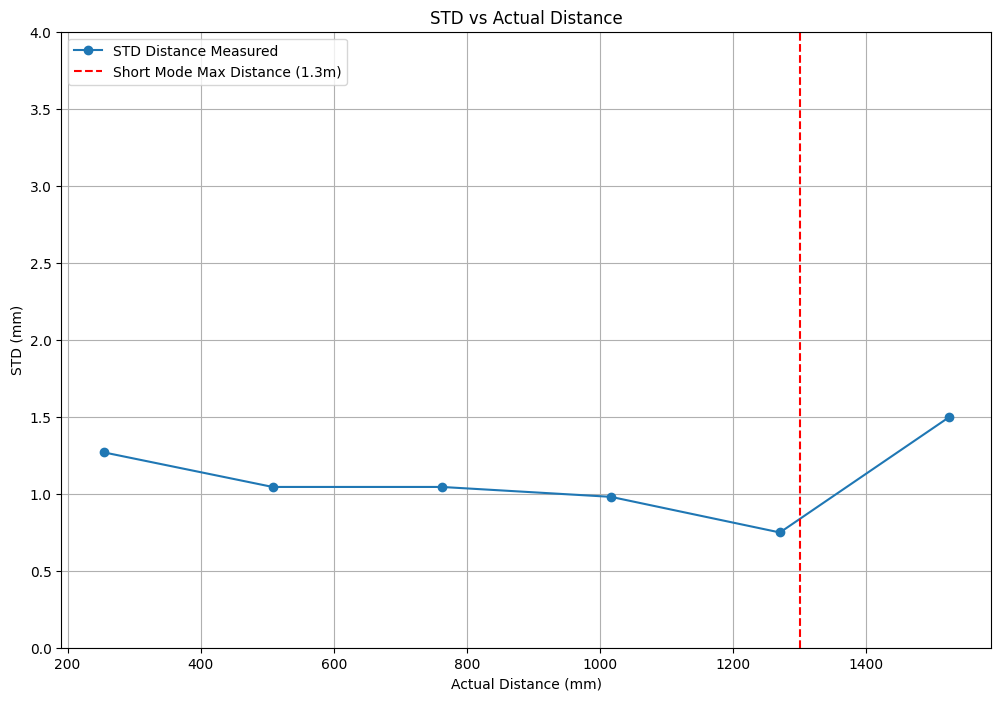

In [194]:
measured_av_arr = [214.7, 478.1, 735.9, 981.8, 1241.2, 1477.6]
measured_std_arr = [1.2689, 1.044, 1.044, 0.9798, 0.7483, 1.4967]
actual_distances = [254, 508, 762, 1016, 1270, 1524]

plt.figure(figsize=(12,8))
# plt.plot(actual_distances, measured_av_arr, marker='o', linestyle='-', label="Mean Distance Measured")
plt.plot(actual_distances, measured_std_arr, marker='o', linestyle='-', label="STD Distance Measured")
plt.ylim(0, 4)
# for x, y in zip(actual_distances, measured_av_arr):
#     plt.text(x, y, f"({x}, {y})", fontsize=9, verticalalignment='bottom', horizontalalignment='right')
plt.axvline(x=1300, color='red', linestyle='--', label="Short Mode Max Distance (1.3m)")
plt.xlabel("Actual Distance (mm)")
plt.ylabel("STD (mm)")
plt.title("STD vs Actual Distance")

# Grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

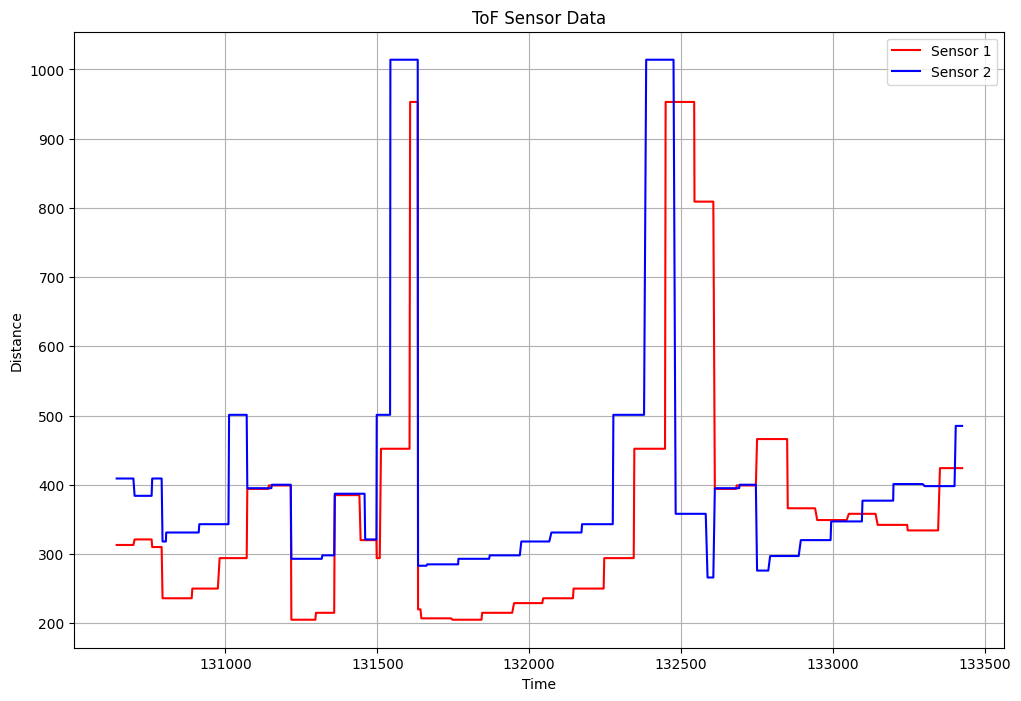

In [ ]:
coordinates = [tuple(map(float, s.split(','))) for s in tof_data]

# Separate x and y values
time_values, sensor1_values, sensor2_values = zip(*coordinates)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(time_values, sensor1_values, color='red', label="Sensor 1")
plt.plot(time_values, sensor2_values, color='blue', label="Sensor 2")

# Labels and title
plt.xlabel("Time")
plt.ylabel("Distance")
plt.title("ToF Sensor Data")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [207]:
print("len: ", len(tof_data))
print("time elapsed: ", time_values[-1] - time_values[0])
print(tof_data)

len:  1000
time elapsed:  2783.0
['130642.0,313.0,409.0', '130644.0,313.0,409.0', '130646.0,313.0,409.0', '130648.0,313.0,409.0', '130649.0,313.0,409.0', '130656.0,313.0,409.0', '130658.0,313.0,409.0', '130660.0,313.0,409.0', '130666.0,313.0,409.0', '130668.0,313.0,409.0', '130670.0,313.0,409.0', '130676.0,313.0,409.0', '130678.0,313.0,409.0', '130680.0,313.0,409.0', '130684.0,313.0,409.0', '130685.0,313.0,409.0', '130687.0,313.0,409.0', '130693.0,313.0,409.0', '130695.0,313.0,409.0', '130697.0,313.0,409.0', '130701.0,321.0,384.0', '130702.0,321.0,384.0', '130704.0,321.0,384.0', '130706.0,321.0,384.0', '130709.0,321.0,384.0', '130711.0,321.0,384.0', '130713.0,321.0,384.0', '130718.0,321.0,384.0', '130719.0,321.0,384.0', '130721.0,321.0,384.0', '130728.0,321.0,384.0', '130730.0,321.0,384.0', '130732.0,321.0,384.0', '130738.0,321.0,384.0', '130740.0,321.0,384.0', '130742.0,321.0,384.0', '130747.0,321.0,384.0', '130749.0,321.0,384.0', '130751.0,321.0,384.0', '130757.0,321.0,384.0', '13075

In [341]:
ble.stop_notify(ble.uuid['RX_STRING'])

## Disconnect

In [342]:
# Disconnect
ble.disconnect()

2025-02-10 19:02:01,708 | INFO     |: Disconnected from EB36BB92-4002-31C3-42B2-2592FE207A21
